# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе. 

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn import preprocessing, decomposition, cluster, metrics, mixture, manifold, model_selection, ensemble
from sklearn.pipeline import Pipeline

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings 

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

In [122]:
data = pd.read_csv(
    "data/data.csv", 
    encoding="ISO-8859-1", 
    dtype={'CustomerID': str,'InvoiceNo': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [123]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print('Временной промежуток с  {} по {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))

Временной промежуток с  2010-12-01 по 2011-12-09


In [124]:
#общая информация по столбцам таблицы
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [125]:
# посмотрим на количество пропусков по столбцам
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [126]:
print('Количество уникальных клиентов составляет {}'.format(data.CustomerID.nunique()))

Количество уникальных клиентов составляет 4372


In [127]:
# информация о том, из каких стран клиенты
print(data.Country.nunique())
data.Country.unique()

38


array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [128]:
# посомтрим на статистические данные цифровых признаков датасета
display(data[(data['UnitPrice'] >= 0) & (data['Quantity'] >= 0)].describe())


,Quantity,InvoiceDate,UnitPrice
count,531283.000000,531283,531283.000000
mean,10.655299,2011-07-04 18:15:33.177910016,3.898954
min,1.000000,2010-12-01 08:26:00,0.000000
25%,1.000000,2011-03-28 11:59:00,1.250000
50%,3.000000,2011-07-20 12:01:00,2.080000
75%,10.000000,2011-10-19 12:35:00,4.130000
max,80995.000000,2011-12-09 12:50:00,13541.330000
std,156.830617,NaN,35.876279


In [129]:
# посмотрим на статистику по оставшимся признакам
data.describe(include='object')

,InvoiceNo,StockCode,Description,CustomerID,Country
count,541909,541909,540455,406829,541909
unique,25900,4070,4223,4372,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17841,United Kingdom
freq,1114,2313,2369,7983,495478


После первого знакомства с данными можно утчерждать, что  на руках имеются данные о более чем 540 тыс. транзакций. У каждой транзакции имеются следующие признаки:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* Stock Code — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию; 
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.

Из этих данных можно сделать, следующие выводы:

* период даных охватывает временной промежуток длинной 12 месяцев
* данные содержат информацию о клиентах из 38 стран
* количество уникальных клиентов более 4300
* два столбца кодируются числовыми признаками: количество единиц товаров (Quantity) и стоимость единицы товаров(UnitPrice)
* среднее количество товаров в заказе равно 10 единицам, что соответстует примерно 75% процентилю
* средний чек составляет около 3.8 условных единиц за товар, медианное значение находится на отметке 2 условных единиц.
* пропуски наблюдается в стобцах с описанием товара (Description) и ID-клиента (CustomerID) 



## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


In [130]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [131]:
print(f'Количество строк в дата сете до удаления строк {data.shape[0]}')
data = data[data.CustomerID.notnull()]
print(f'Количество пропущеных значений после их удаления: {data.isnull().sum().sum()} штук')
print(f'Количество записей после удаления строк содержащих пропуски {data.shape[0]}')

Количество строк в дата сете до удаления строк 541909
Количество пропущеных значений после их удаления: 0 штук
Количество записей после удаления строк содержащих пропуски 406829


#### 2.1.2. Дубликаты

Проверьте данные на наличие дубликатов. Удалите их из данных.


In [132]:
print(f'Количество дубликатов: {data.duplicated().sum()}')
print(f'Количество строк в дата сете до удаления дубликатов {data.shape[0]}')
data.drop_duplicates(inplace=True)
print(f'Количество записей после удаления дубликатов {data.shape[0]}')

Количество дубликатов: 5225
Количество строк в дата сете до удаления дубликатов 406829
Количество записей после удаления дубликатов 401604


#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [133]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

In [134]:
nb_products_per_basket_temp = nb_products_per_basket.copy()

nb_products_per_basket_temp['order_canceled'] \
    = nb_products_per_basket['InvoiceNo'].apply(
        lambda x: 1 if x[0]=='C' else 0)

print('Процент возвратов составляет: {:.0f} %'.format(
    nb_products_per_basket_temp['order_canceled'].mean() * 100))

Процент возвратов составляет: 16 %


Создайте в ваших данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

В качестве вспомогательного инструмента мы подготовили для вас функцию `get_quantity_canceled()`. Эта функция принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как `NaN`.

Отметим, что эта функция не учитывает сложный случай, когда количество отменённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом). При желании вы можете самостоятельно модифицировать функцию для предобработки, чтобы учесть этот пограничный случай.

*Осторожно! Поиск отменённых транзакций занимает много времени из-за большого количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от мощности компьютера.*

In [135]:
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов. 
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для кажой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)    
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) & 
                       (data['InvoiceDate'] < col['InvoiceDate']) & 
                       (data['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0): 
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого товара в столбец QuantityCanceled 
        elif (df_test.shape[0] == 1): 
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']       
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате.
        elif (df_test.shape[0] > 1): 
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']: 
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break    
    return quantity_canceled

data['QuantityCanceled'] = get_quantity_canceled(data)

*Осторожно! Поиск отмененных транзакций занимает достаточно длительное время из-за количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от компьютера.*

Узнайте, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалите их из данных.

Когда вы разобрались с возвратами, удалите транзакции с отрицательным количеством товара — они нам больше не нужны.



In [136]:
print(f'Количество строк в дата сете до обработки {data.shape[0]}')
data = data[data['Quantity'] >= 0].copy()
print(f'Количество записей после обработки {data.shape[0]}')

Количество строк в дата сете до обработки 401604
Количество записей после обработки 392732


#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [137]:
mask = data['StockCode'].str.contains('^[a-zA-Z]+', regex=True)
print(data[mask]['StockCode'].unique())
print(f'Количество записей до удаление записей о специальных транзакциях {data.shape[0]}')
data = data[~mask].copy()
print(f'Количество записей текущее: {data.shape[0]}')

['POST' 'C2' 'M' 'BANK CHARGES' 'PADS' 'DOT']
Количество записей до удаление записей о специальных транзакциях 392732
Количество записей текущее: 391183


#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [138]:
mask = data['UnitPrice'] == 0
print(f'Количество транзакции с товарами нулевой стоимостью: {data[mask].shape[0]}')
data = data[~mask].copy()
print(f'Количество записей текущее: {data.shape[0]}')

Количество транзакции с товарами нулевой стоимостью: 33
Количество записей текущее: 391150


#### 2.1.6. Общая стоимость товаров в транзакции

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:
 
 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

In [139]:
data['TotalPrice'] = data.UnitPrice * (data.Quantity - data.QuantityCanceled)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34


Помимо рекомендованных преобразований, вы также можете придумать собственные и применить их к исходным данным.
После завершения предобработки сохраните результат очищения данных в отдельный файл, чтобы впоследствии вам не приходилось повторять эти действия.


In [140]:
#сохраняем в виде отдельного подготовленного файла
# data.to_csv('data/cleaned_df.csv', index=False)
# data.to_pickle('data/cleaned_df.pickle')

### 2.2. Разведывательный анализ

После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)? 

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.

Свои рассуждения сопроводите графиками и диаграммами.



In [141]:
# data = pd.read_csv('data/cleaned_df.csv')
data = pd.read_pickle('data/cleaned_df.pickle')

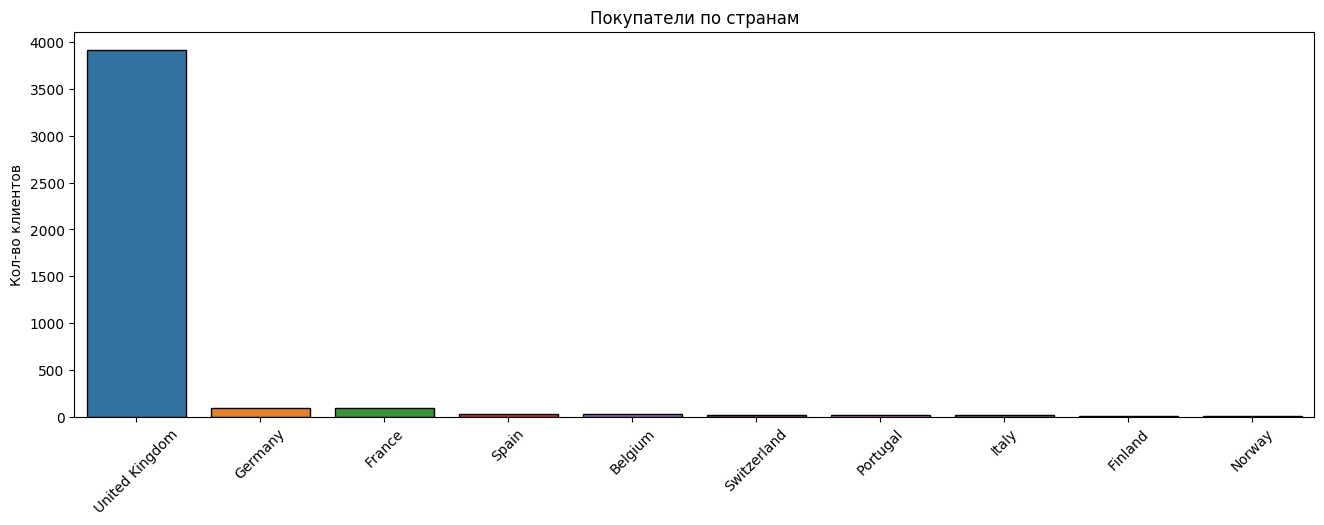

In [142]:
countries_temp = data.drop_duplicates(subset='CustomerID').groupby(
    'Country')['CustomerID'].count().sort_values(ascending=False).to_frame().reset_index().head(10)
countries_temp.rename(columns={'CustomerID': 'n_customers'}, inplace=True)

fig, axes = plt.subplots(figsize=(16, 5))
sns.barplot(data=countries_temp, x='Country', y='n_customers')
plt.xticks(rotation=45)
axes.set_xlabel(None)
axes.set_ylabel('Кол-во клиентов')
axes.set_title('Покупатели по странам');

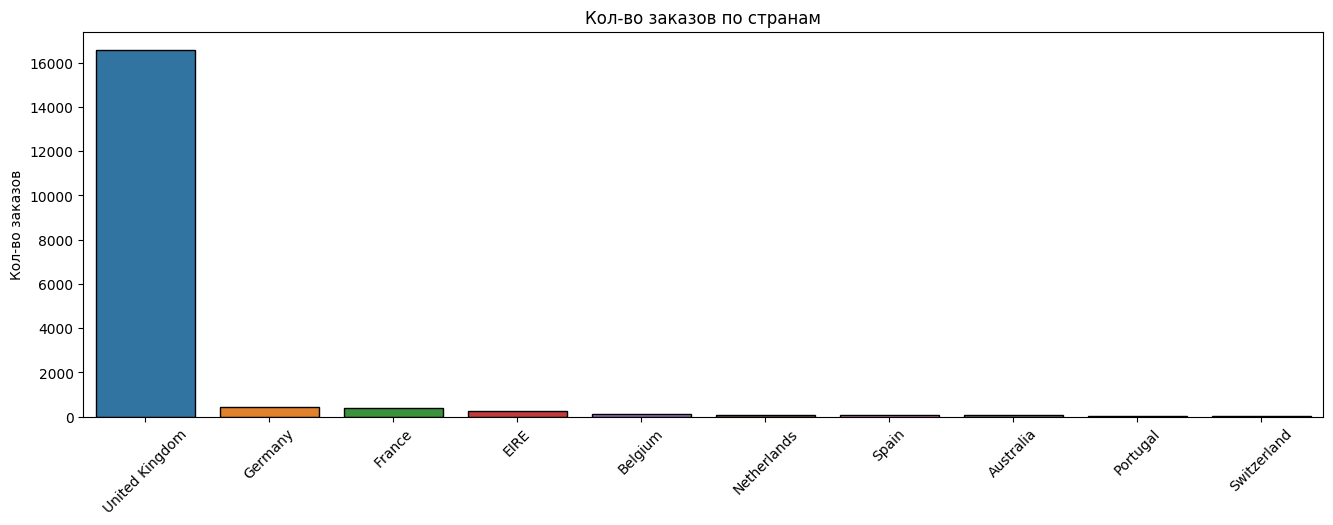

In [143]:
orders_temp = data.drop_duplicates(subset='InvoiceNo').groupby(
    'Country')['InvoiceNo'].count().sort_values(ascending=False).to_frame().reset_index().head(10)
orders_temp.rename(columns={'InvoiceNo': 'n_orders'}, inplace=True)

fig, axes = plt.subplots(figsize=(16, 5))
sns.barplot(data=orders_temp, x='Country', y='n_orders')
plt.xticks(rotation=45)
axes.set_xlabel(None)
axes.set_ylabel('Кол-во заказов')
axes.set_title('Кол-во заказов по странам');

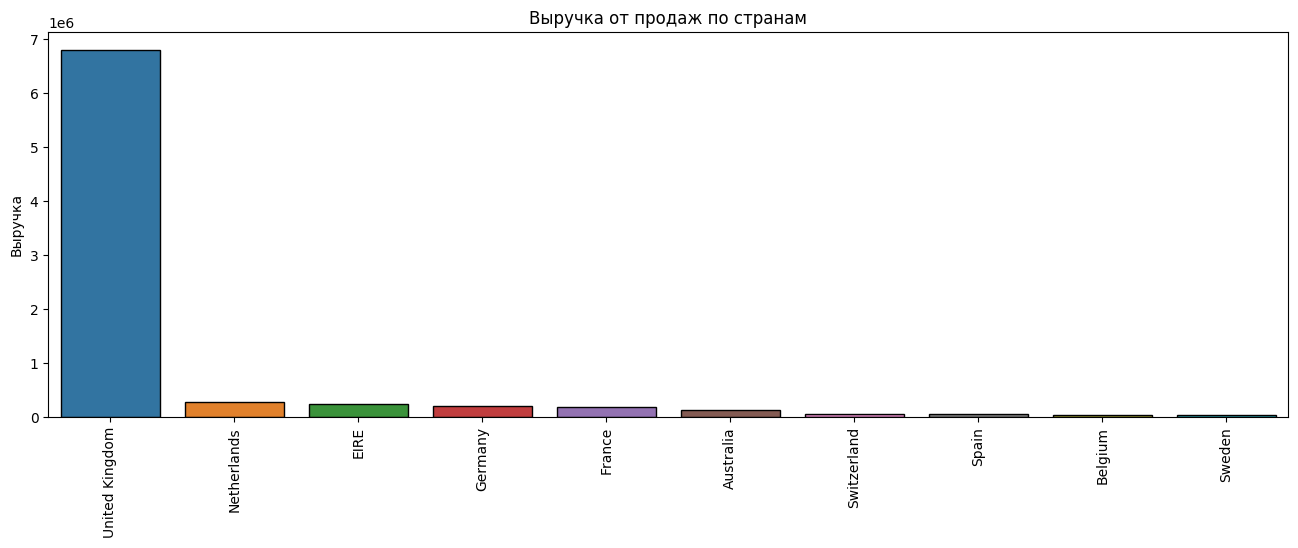

In [144]:
revenue_temp = data.groupby('Country')['TotalPrice'].sum().sort_values(
    ascending=False).to_frame().reset_index().head(10)
revenue_temp.rename(columns={'TotalPrice': 'income'}, inplace=True)

fig, axes = plt.subplots(figsize=(16, 5))
sns.barplot(data=revenue_temp, x='Country', y='income')
plt.xticks(rotation=90)
axes.set_xlabel(None)
axes.set_ylabel('Выручка')
axes.set_title('Выручка от продаж по странам');

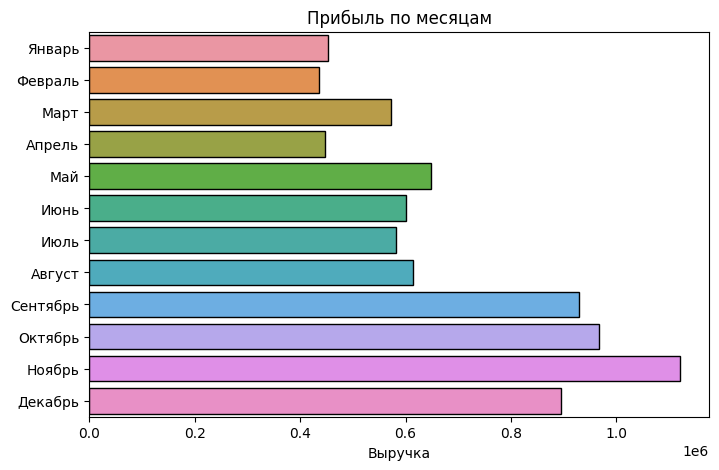

In [145]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Month'] = data['InvoiceDate'].dt.month
data['WeekDay'] = data['InvoiceDate'].dt.day_of_week
data['Hour'] = data['InvoiceDate'].dt.hour

month_revenue_temp = data.groupby('Month')['TotalPrice'].sum().to_frame().reset_index()
month_revenue_temp.rename(columns={'TotalPrice': 'Revenue'}, inplace=True)

fig, axes = plt.subplots(figsize=(8, 5))
sns.barplot(data=month_revenue_temp, x='Revenue', y='Month', orient='h')
axes.set_yticklabels(['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август',
                      'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'])
axes.set_ylabel(None)
axes.set_xlabel('Выручка')
axes.set_title('Прибыль по месяцам');

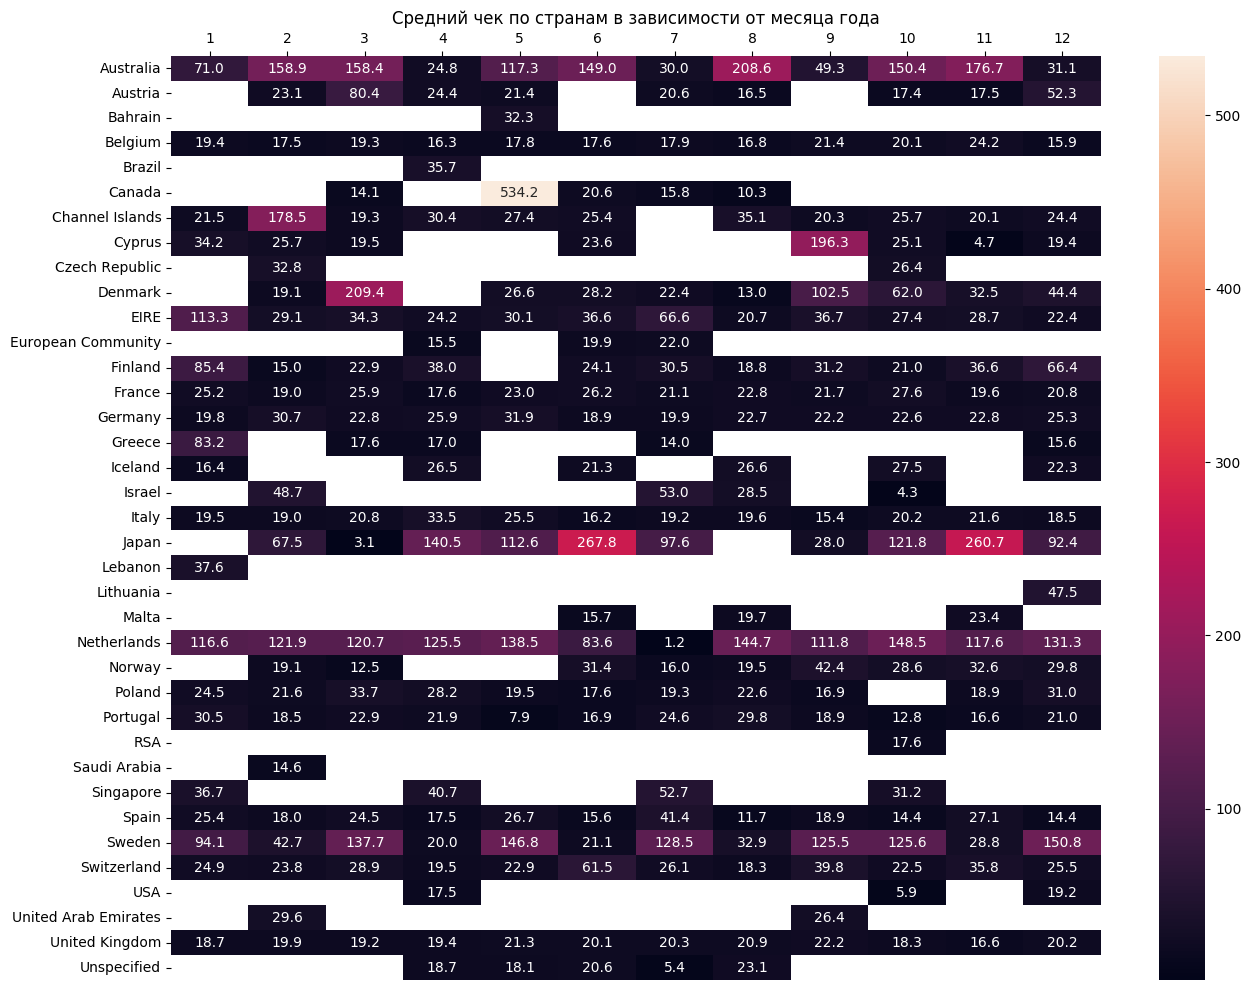

In [146]:
pivot = pd.pivot_table(data, values='TotalPrice', index='Country', columns='Month', aggfunc='mean')

# plt.figure(figsize=(15,12))
fig, axes = plt.subplots(figsize=(15, 12))

sns.heatmap(pivot, annot=True, fmt='.1f')
axes.set(xlabel="", ylabel="")
axes.xaxis.tick_top()
axes.set_title('Средний чек по странам в зависимости от месяца года');

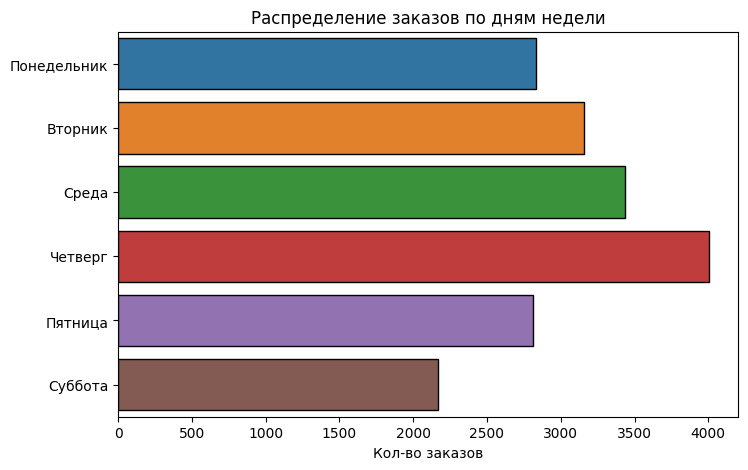

In [147]:
week_orders = data.drop_duplicates(subset='InvoiceNo').groupby(
    'WeekDay')['InvoiceNo'].count().to_frame().reset_index()
week_orders.rename(columns={'InvoiceNo': 'n_orders'}, inplace=True)

fig, axes = plt.subplots(figsize=(8, 5))
sns.barplot(data=week_orders, x='n_orders', y='WeekDay', orient='h')
axes.set_yticklabels(['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота'])
axes.set_ylabel(None)
axes.set_xlabel('Кол-во заказов')
axes.set_title('Распределение заказов по дням недели');

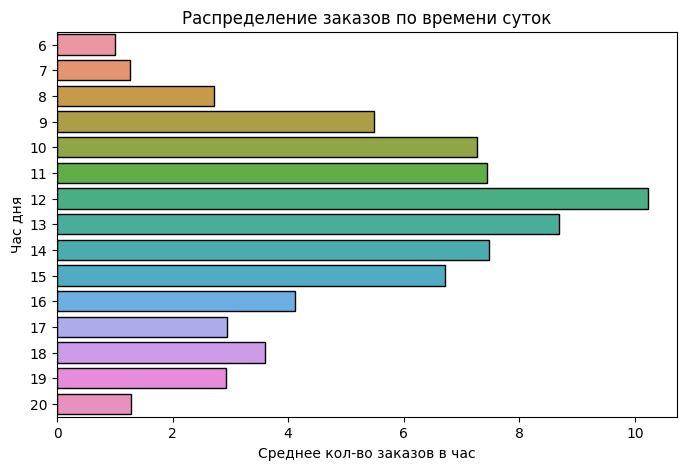

In [148]:
data['Date'] = data['InvoiceDate'].dt.date
hourly_orders = data.drop_duplicates(subset='InvoiceNo').groupby(
    ['Date', 'Hour'])['InvoiceNo'].count().to_frame().reset_index()

hour_mean = hourly_orders.groupby('Hour')['InvoiceNo'].mean().to_frame().reset_index()
hour_mean.rename(columns={'InvoiceNo': 'hour_mean_order'}, inplace=True)

fig, axes = plt.subplots(figsize=(8, 5))
sns.barplot(data=hour_mean, x='hour_mean_order', y='Hour', orient='h')
axes.set_ylabel('Час дня')
axes.set_xlabel('Среднее кол-во заказов в час')
axes.set_title('Распределение заказов по времени суток');


После проведенного анализа, можно сделать выводы:

* большинство покупателей из европейских стран, среди которых на первом месте с большим отрывом лидирует Великобритания
* лидеры в свете распределения заказов по странам остались прежними: Великобритания, Франция и Германия
* в плане распределение выручки по странам, как и следовало ожидать большу часть выручки приносят клиенты из Великобритании, а вот Германию и Францию по выручке потеснили Ирландия и Нидерланды.
* в плане сезонности, можно смело утверждать, что месячная прибыль увеличивается в месяцы предшествующие зимним праздникам Новому году и Рождеству - октябрь и ноябрь. С началом нового года продажи падают почти в два раз, постепенно начиная увеличиватся с наступлением лета. 
* явяная сезоность наблюдается в поведении  покупатели из Нидерландов, Австралии и Японии
* по распределение количества заказов по дням недели, легко заметить, что пик продаж приходится на середину недели - Среду и Четверг. Минимальное количество заказов в выходной день Субботу. Отсутствует информации о покупках в Воскресенье, что может являтся индикатором того, что торговая площадка в этот день недели не работает.
* по распределению заказов в разрезе времени суток, можно смело утверждать о том, что основное количество заказов приходится на полдень

### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM. 

<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов. 

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [149]:
recency = ((data['InvoiceDate'].max() - pd.to_datetime(data.groupby('CustomerID')['InvoiceDate'].max())) / np.timedelta64(1, 'D')).astype(int)
frequency = data.drop_duplicates(subset='InvoiceNo').groupby('CustomerID')['InvoiceNo'].count()
money = data.groupby('CustomerID')['TotalPrice'].sum()
rfm_table = pd.concat({
    'Recency': recency, 'Frequency': frequency, 'Monetary': money}, 
    axis=1)
rfm_table.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,0.00
12347,1,7,4310.00
12348,74,4,1437.24
12349,18,1,1457.55
12350,309,1,294.40


После того как вы подготовите RFM-таблицу, визуализируйте каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot). Вы получите примерно следующие результаты (графики могут отличаться в зависимости от того, как вы выполните предобработку данных):

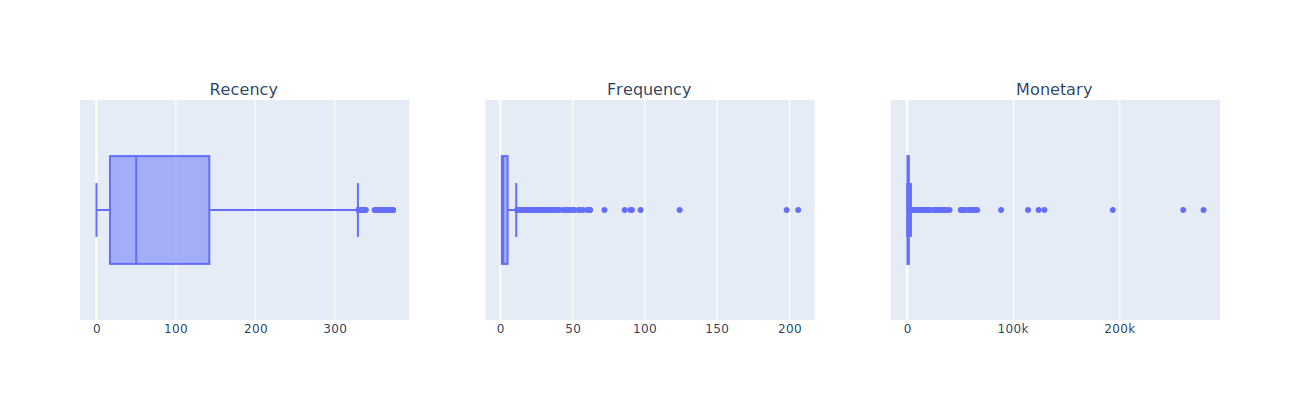

In [150]:
boxes = [px.box(rfm_table, x=column) for column in rfm_table.columns]
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True, height=400, width=1300)
fig.write_html('plotly/boxplot_1.html')
fig.show('svg')

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


from golddigger
Удалите из RFM-таблицы записи о клиентах, для которых выполняется хотя бы одно из условий:

$$frequency >frequency_{0.95}$$
$$monetary >monetary_{0.95}$$ 

где $frequency_{0.95}$ и $monetary_{0.95}$ - квантили уровня 0.95 для соответствующих признаков. 

Данные о скольких клиентах у вас остались в RFM-таблице?

In [151]:
print(f'Количество записей до удаление выбросов: {rfm_table.shape[0]}')
mask1 = rfm_table['Frequency'] > rfm_table['Frequency'].quantile(0.95)
mask2 = rfm_table['Monetary'] > rfm_table['Monetary'].quantile(0.95)
rfm_table_cleaned = rfm_table[~mask1 & ~mask2].copy()
print(f'Количество записей текущее: {rfm_table_cleaned.shape[0]}')

Количество записей до удаление выбросов: 4334
Количество записей текущее: 4044


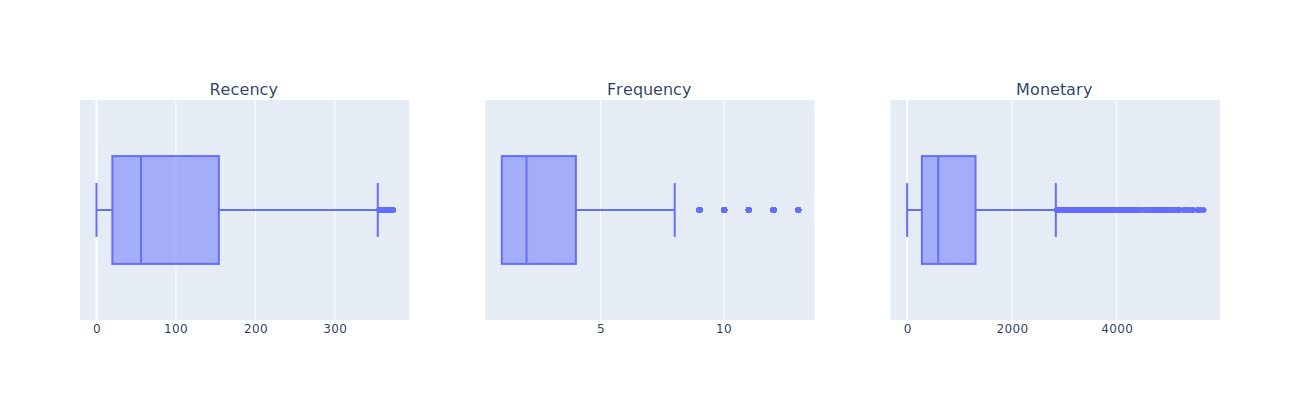

In [152]:
boxes = [px.box(rfm_table_cleaned, x=column) for column in rfm_table_cleaned.columns]
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=(
        "Recency", "Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True, height=400, width=1300)
fig.write_html('data/boxplot_2.html')
fig.show('svg')


In [153]:
#так же сохраним подготовленную таблицу в виде отдельного файла
# rfm_table_cleaned.to_csv('data/rfm_table_cleaned.csv', index=False)
# rfm_table_cleaned.to_pickle('data/rfm_table_cleaned.pickle')

## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

**Подсказка.** Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства оберните эти шаги по предобработке данных в pipeline.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга). 

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.


In [154]:
# rfm_table_cleaned = pd.read_csv('data/rfm_table_cleaned.csv')
rfm_table_cleaned = pd.read_pickle('data/rfm_table_cleaned.pickle')

In [155]:
pipeline = Pipeline([
    ('scaler', preprocessing.StandardScaler()), 
    ('pca', decomposition.PCA(n_components=2))
])
pca = pipeline.fit_transform(rfm_table_cleaned)


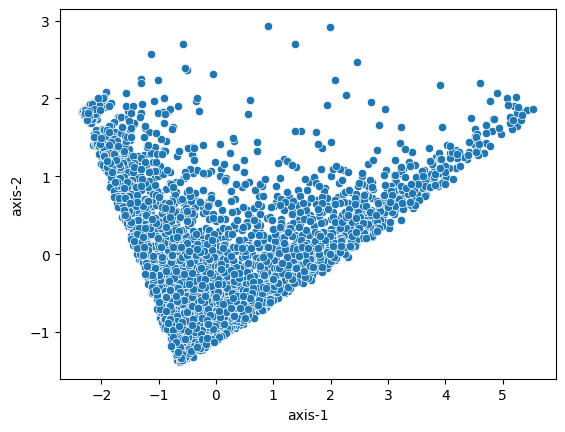

In [156]:
#визуализируем скомпонованные данных для двух осей
rfm_table_compossed = pd.DataFrame(pca, columns=['axis-1', 'axis-2'])
sns.scatterplot(data=rfm_table_compossed, x='axis-1', y='axis-2');

Предпочтительное количество кластеров: 3
Максимальный коэффициент силуэта: 0.52


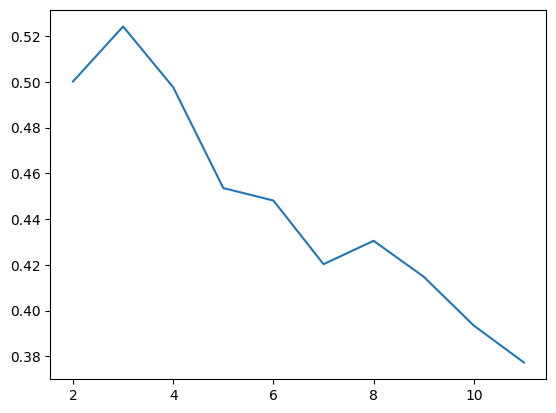

In [157]:
"""Сперва воспользуемся алгоритмом k-means. 
Постараемся подбрать k-means с помощью коэффициента силуэта, перебирая возможные значения от 2 до 11 включительно.""" 

coeff = []
for cl in range(2,12):
    kmeans = cluster.KMeans(cl, random_state=42)
    kmeans.fit(pca)
    coeff.append(metrics.silhouette_score(pca, kmeans.labels_))
plt.plot(range(2,12), coeff);
print(f'Предпочтительное количество кластеров: {np.argmax(coeff) + 2}')
print(f'Максимальный коэффициент силуэта: {max(coeff):.2f}')

Предпочтительное количество кластеров: 3
Максимальный коэффициент силуэта: 0.44


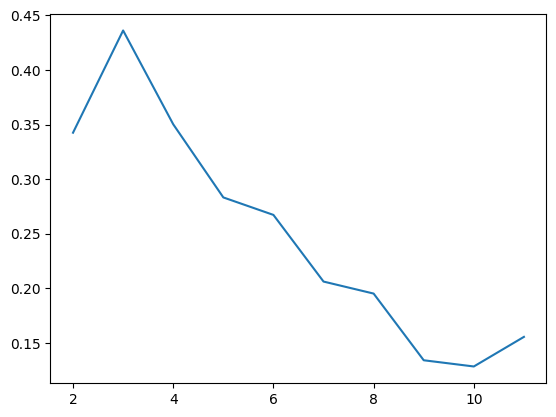

In [158]:
"""Затем протестируем ЕМ-алгоритмом. 
Так же подберем коэффициент силуэта, перебирая возможные значения от 2 до 11 включительно.""" 

coeff = []
for cl in range(2,12):
    gmix = mixture.GaussianMixture(n_components = cl, random_state=42)
    labels = gmix.fit_predict(pca)
    coeff.append(metrics.silhouette_score(pca, labels))
plt.plot(range(2,12), coeff);
print(f'Предпочтительное количество кластеров: {np.argmax(coeff) + 2}')
print(f'Максимальный коэффициент силуэта: {max(coeff):.2f}')

Best number of clusters: 2
Silhouette max: 0.51


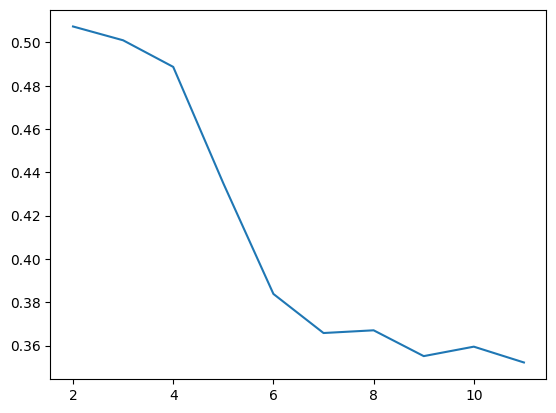

In [159]:
"""В третьех применим алгоритмом алгомеративной кластеризации. 
Так же подберем коэффициент силуэта, перебирая возможные значения от 2 до 11 включительно.""" 
coeff = []
for cl in range(2,12):
    tree = cluster.AgglomerativeClustering(cl)
    tree.fit(pca)
    coeff.append(metrics.silhouette_score(pca, tree.labels_))
plt.plot(range(2,12), coeff);
print(f'Best number of clusters: {np.argmax(coeff) + 2}')
print(f'Silhouette max: {max(coeff):.2f}')

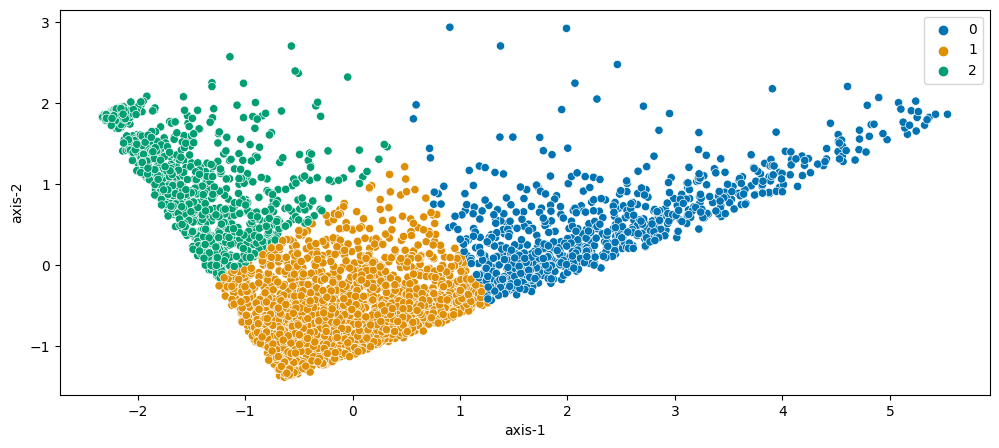

In [160]:
""" Наилучшим образом себя проявил алгоритм K-Means. Воспользуемся им для определения меток кластеров.
    Визуализируем сами кластеры в 2-d пространстве """
kmeans = cluster.KMeans(3, random_state=42)
labels = kmeans.fit_predict(pca)
fig = plt.figure(figsize=(12, 5))
sns.scatterplot(
    data=rfm_table_compossed, 
    x='axis-1', 
    y='axis-2', 
    hue=labels,
    palette='colorblind'
);


### 3.2. Интерпретация результатов кластеризации

Перейдём к интерпретации полученных кластеров.

In [161]:
#добавим метки кластеров в таблицу и сгрупируем по средним значениям
rfm_table_cleaned['Cluster'] = labels
rfm_mean = rfm_table_cleaned.groupby('Cluster').mean().round()

#### 3.2.1. Визуализация кластеров

Визуализируйте результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируйте полученную диаграмму и попробуйте понять, какие кластеры у вас получились.

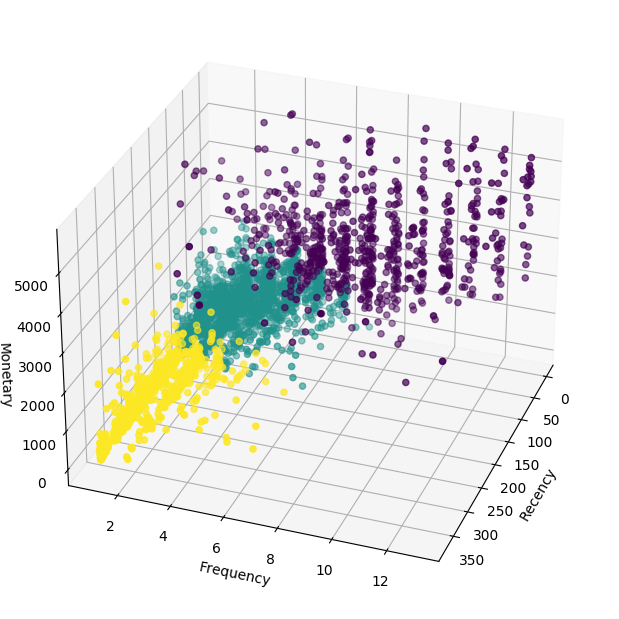

In [162]:
# создадим трёхмерный объект
plt.style.use('_classic_test_patch')
# sns.set_style("colorblind")
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавим дополнительную ось в объект картинки
fig.add_axes(ax)
ax.azim = 20
ax.elev = 30

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(
    rfm_table_cleaned['Recency'].to_list(), 
    rfm_table_cleaned['Frequency'].to_list(),
    rfm_table_cleaned['Monetary'].to_list(),
    c = labels
)
# добавим оси
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary');

По получившейся визуализаци сказать, что-то определенное достаточно затруднительно. В следующем модуле постараемся построить профиль кластеров

#### 3.2.2. Построение профиля кластеров

Далее составьте так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник. 

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле `graph_objects` библиотеки `plotly` есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов), `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию `plot_cluster_profile()`.


In [163]:
def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = preprocessing.MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show('svg')

Теперь у вас есть удобный инструмент для анализа профиля кластеров. Воспользуйтесь им, чтобы проинтерпретировать результаты, полученные на предыдущем шаге.

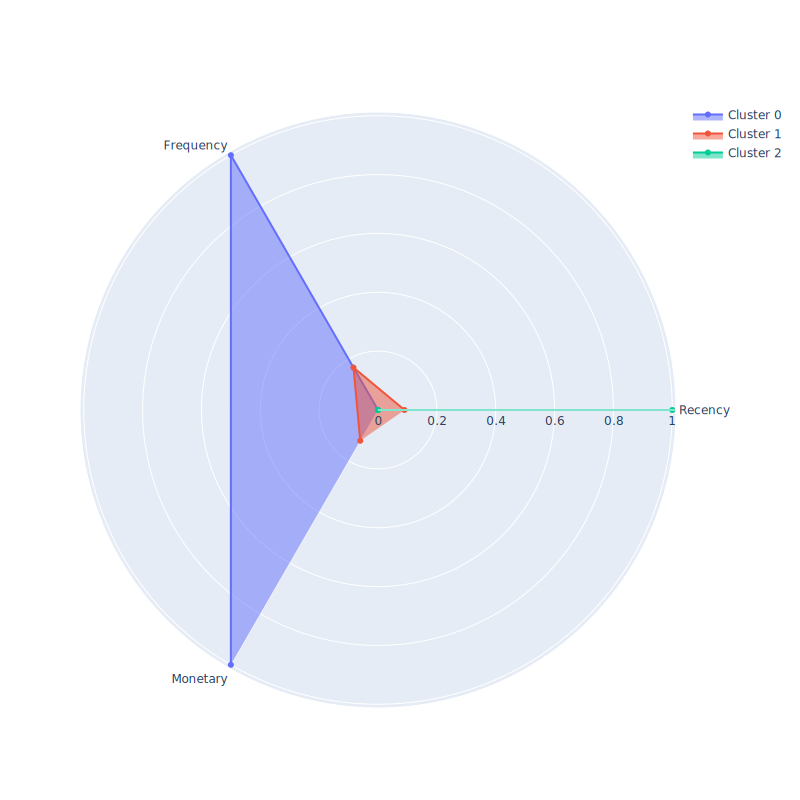

In [164]:
plot_cluster_profile(rfm_mean, 3)

In [165]:
display(rfm_mean)

,Recency,Frequency,Monetary
Cluster,,,
0,31.0,7.0,2658.0
1,51.0,2.0,660.0
2,253.0,1.0,386.0


Опираясь на таблицу, а так же ее графическое представление в виде профиля кластеров - можно сказть, что алгоритм определили выделил три следующих кластера:
* Кластер 0 - соответствует «лояльным» клиентам, которые приносят наибольший доход, совершают покупки чаще остальных, а давность их последней покупки наименьшая.
* Кластер 1 - соответствует «перспективные» клиентам, которые покупают активно, но все же  не так часто и много, как "лояльные" клиенты.
* Кластер 2 -  соответствует «потерянным» клиентам, которые приобрели меньше всех товара, а их последняя покупка была совершена давно.


## 4. Построение модели машинного обучения с использованием нелинейной трансформации.

В предыдущем пункте была произведена сегментация клиентов на три кластера, однако если еще раз вернутся к ранее приведенной таблице то можно заметить, что клиенты разделены на большее количесто групп (7 групп)


<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>


Постараемся разделить нашу выборку на аналогичную разбивку воспользовавшись нелинейным алгоритмом TSNE для сжатия пространства.


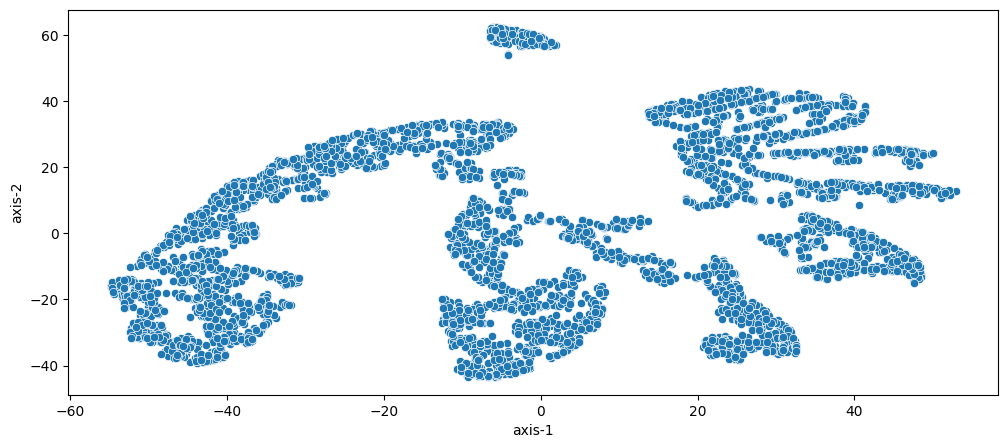

In [166]:

rfm_table_cleaned = pd.read_pickle('data/rfm_table_cleaned.pickle')

pipeline_tsne = Pipeline([
    ('scaler', preprocessing.StandardScaler()), 
    ('tsne', manifold.TSNE(perplexity=50, random_state=100))
])
tsne = pipeline_tsne.fit_transform(rfm_table_cleaned)

rfm_table_processed = pd.DataFrame(tsne, columns=['axis-1', 'axis-2'])

fig = plt.figure(figsize=(12, 5))
sns.scatterplot(data=rfm_table_processed, x='axis-1', y='axis-2');



Алгоритм  t-SNE уже трансформировал наши данные в некоторое подобие кластеров.

На вновь предобработанных данных снова проведем кластаризацию используя все те же три метода

Best number of clusters: 7
Silhouette max: 0.49


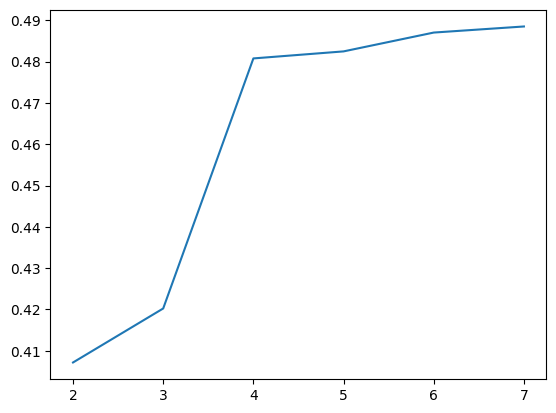

In [167]:
coeff = []
for cl in range(2,8):
    kmeans = cluster.KMeans(cl, random_state=42)
    kmeans.fit(tsne)
    coeff.append(metrics.silhouette_score(tsne, kmeans.labels_))
plt.plot(range(2,8), coeff);
print(f'Best number of clusters: {np.argmax(coeff) + 2}')
print(f'Silhouette max: {max(coeff):.2f}');

Best number of clusters: 4
Silhouette max: 0.46


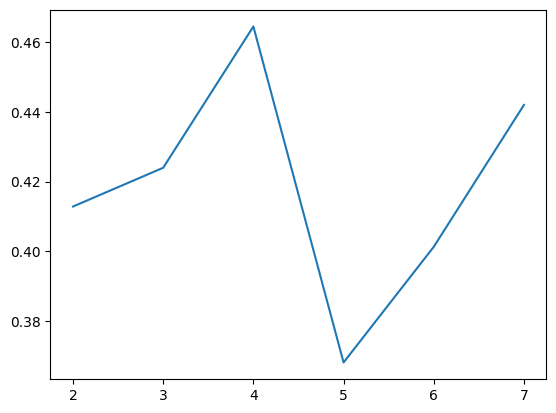

In [168]:
coeff = []
for cl in range(2,8):
    gmix = mixture.GaussianMixture(cl, random_state=42)
    labels = gmix.fit_predict(tsne)
    coeff.append(metrics.silhouette_score(tsne, labels))
plt.plot(range(2,8), coeff);
print(f'Best number of clusters: {np.argmax(coeff) + 2}')
print(f'Silhouette max: {max(coeff):.2f}');

Best number of clusters: 6
Silhouette max: 0.46


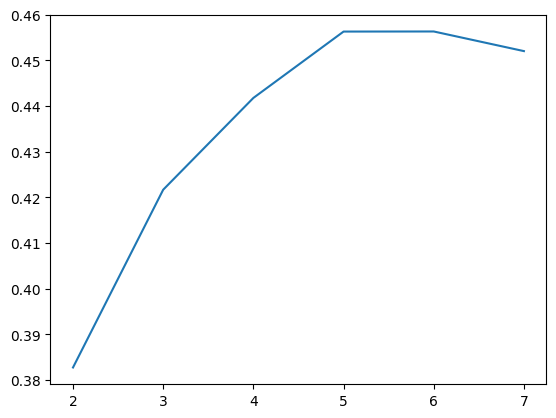

In [169]:
coeff = []
for cl in range(2,8):
    tree = cluster.AgglomerativeClustering(cl)
    tree.fit(tsne)
    coeff.append(metrics.silhouette_score(tsne, tree.labels_))
plt.plot(range(2,8), coeff);
print(f'Best number of clusters: {np.argmax(coeff) + 2}')
print(f'Silhouette max: {max(coeff):.2f}')

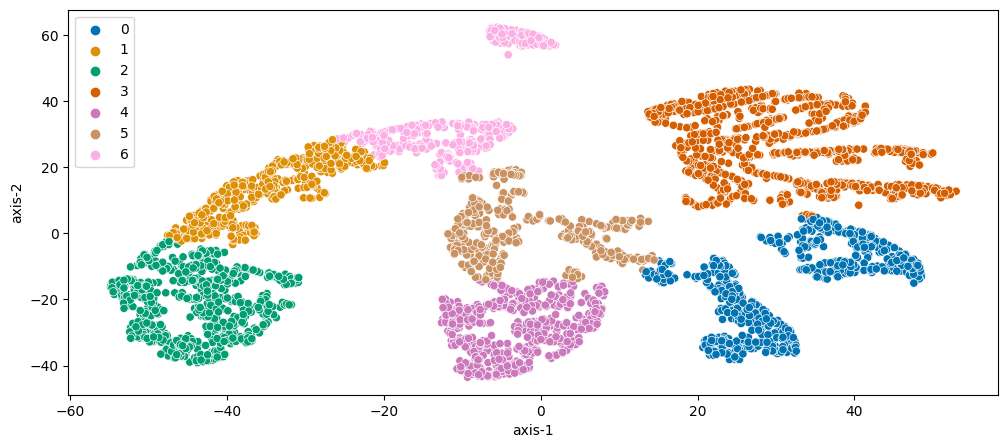

In [170]:
""" И в новь наилучшим образом себя проявил алгоритм K-Means. Воспользуемся им для определения меток кластеров, которых как и в табличке маркетологов оказалось 7 штук
    Визуализируем сами кластеры в 2-d пространстве """
kmeans = cluster.KMeans(7, random_state=42)
labels = kmeans.fit_predict(tsne)
fig = plt.figure(figsize=(12, 5))
sns.scatterplot(
    data=rfm_table_processed, 
    x='axis-1', 
    y='axis-2', 
    hue=labels,
    palette='colorblind'
);


In [171]:
""" Вновь вернемся от сжатых данных к оригинальном RFM-таблице присвоив метки кластеров
и вновь подготовив таблицу средних значений по кластерам для построения графического профиля кластеров, описание которых будут даны уже в заключение"""

rfm_table_cleaned['Cluster'] = labels
rfm_pivot = rfm_table_cleaned.groupby('Cluster').mean().round(0)


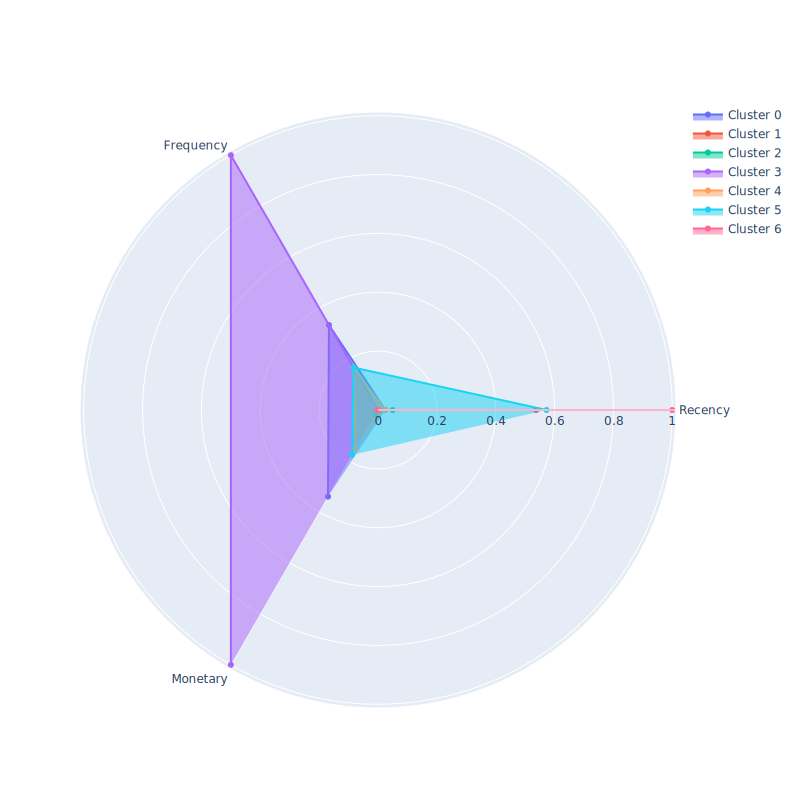

In [172]:
plot_cluster_profile(rfm_pivot, 7)

## 5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.

Напишите заключение о проделанной работе и полученных результатах. Отметьте, какие сегменты клиентов вам удалось найти в данных.

После завершения проекта создайте в своём репозитории файл README.md и кратко опишите содержимое проекта по принципу, который мы приводили ранее.

Выложите свой проект на GitHub и оформите удалённый репозиторий, добавив в него описание и теги репозитория (теги придумайте самостоятельно в зависимости от того, какую задачу вы решали).

In [173]:
display(rfm_pivot)

,Recency,Frequency,Monetary
Cluster,,,
0,39.0,3.0,1007.0
1,183.0,1.0,281.0
2,46.0,1.0,321.0
3,32.0,7.0,2417.0
4,39.0,2.0,607.0
5,193.0,2.0,657.0
6,313.0,1.0,284.0


Опираясь на таблицу, а так же ее графическое представление в виде профиля кластеров - можно сказть, что алгоритм определили  семь следующих кластеров, которые можно соотнести с оригинальной таблицой:

* Кластер 3 - соответствует «лояльным» клиентам, которые приносят наибольший доход, совершают покупки чаще остальных, а давность их последней покупки наименьшая.
* Кластер 0 - соответствует «преспективным» клиентам, которые покупают активно, но все же  не так часто и много, как "лояльные" клиенты.
* Кластер 4 - соответствует «подвисшим» клиентам, которые  недавно сделали несколько заказов на небольшие суммы.                     
При определенных усилиях со стороны маркетинга есть шанс перевести в разряд «перспективных».
* Кластер 5 - соответствует клиентам «в зоне риска», которые несколько раз покупали товары на небольшие суммы, однако последняя покупка была  более пяти месяцев назад.
* Кластер 2 - соответствует клиентам-«новичкам», которые недавно сделали один заказ на небольшую сумму. 
* Кластер 1 - соответствует «спящим» клиентам, которые совершили мало покупок на небольшую сумму более семи месяцев назад и больше не возвращались.
* Кластер 6 - соответствует «потерянным» клиентам, которые купили меньше всего товара, и их последняя покупка была совершена около года назад.

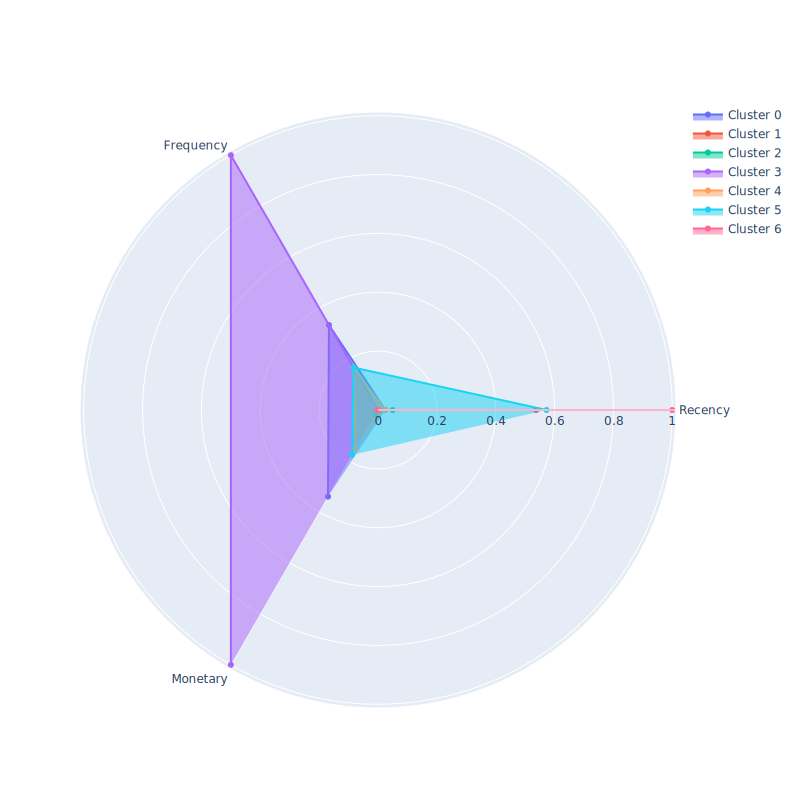

In [174]:
plot_cluster_profile(rfm_pivot, 7)

По итогу создадим модель машинного обучения, которая по меткам RFM будет в дальнейшем предсказывать к какому классу отнести покупателей при поступлении новых данных 

In [175]:
X = pd.read_pickle('data/rfm_table_cleaned.pickle')
y = labels
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=42)
y_test.shape[0]

809

In [176]:
#создадим сетку параметров
param_grid = {
    'max_depth': range(5, 10, 15),
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200, 500, 1000]
}

# Создадим сетку поиска с кросс-валидацией на 5 фолдах
grid_search = model_selection.GridSearchCV(
    estimator = ensemble.RandomForestClassifier(
        random_state=42), 
    param_grid=param_grid, 
    scoring = 'accuracy',
    cv=5, 
    n_jobs = -1
)  
grid_search.fit(X_train, y_train) 
print(f'Лучшие параметры мультиклассификации: {grid_search.best_params_}')
y_test_pred = grid_search.predict(X_test)
print('метрика аccuracy равна: {:.3f}' \
    .format(metrics.accuracy_score(y_test, y_test_pred)))

Лучшие параметры мультиклассификации: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 500}
метрика аccuracy равна: 0.973


In [177]:
print('Метрика precision равна: {:.3f}' \
    .format(metrics.precision_score(y_test, y_test_pred, average='weighted')))

Метрика precision равна: 0.974
